In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import calendar
import numpy as np
import pandas as pd
from joblib import load

from helper import *

In [3]:
showings = load('../data/showings_extra_feature.joblib')
showings.replace(np.inf, 0, inplace=True)
genres = load('../data/genres.joblib')

In [4]:
week_of_release = showings.loc[showings.days_since_release < 10, ('dayofweek', 'tmdb_revenue', 'year', 'coverage')]

# Coverage by revenue for the week following the release

In [5]:
revenue = list(set(week_of_release.tmdb_revenue.unique().round()))
revenue.sort()

In [6]:
%%time
stats = dict()
for i in revenue:
    if np.isfinite(i):
        j = custom_round(i, base=1e+8)
        if j not in stats:
            stats[j] = week_of_release.loc[week_of_release.tmdb_revenue.round() == i, 'coverage']
        else:
            stats[j].append(week_of_release.loc[week_of_release.tmdb_revenue.round() == i, 'coverage'])

Wall time: 3.36 s


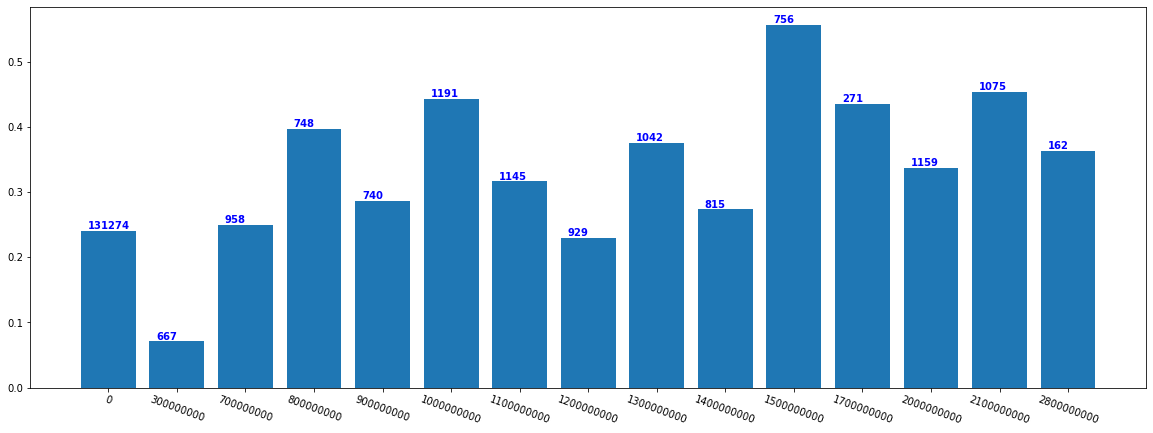

In [7]:
bar_plot(stats, w=20, h=7, r=340)